# 1. Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os

# 2. Importing Data

In [2]:
# create a path to data sets
path = r'/Users/tuyetnguyen/Desktop/Career Foundry/Achievement 4/04-2023 Instacart Basket Analysis'

# Task

##### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
# Import the latest data set
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_customers_merge.pkl'))

##### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# Take a look at the data set
ords_prods_custs.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


While individual columns may not provide enough information to identify an individual, certain combinations of columns may reveal personally identifiable information (PII). For example, 
- first_name + surname 
- first_name + surname + date_joined/gender/state/age/n_dependants/fam_status/income
Therefore, it is important to handle these columns with appropriate security measures to protect the privacy and confidentiality of individuals' PII.

##### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). 
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [5]:
# create a for-loop to categorize the states

result = []

for state in ords_prods_custs['state']:
    if state in [
                'Maine',
                'New Hampshire',
                'Vermont',
                'Massachusetts',
                'Rhode Island',
                'Connecticut',
                'New York',
                'Pennsylvania',
                'New Jersey'
    ]:
        result.append('Northeast')
    elif state in [
                  'Wisconsin',
                  'Michigan',
                  'Illinois'
                  'Indiana',
                  'Ohio',
                  'North Dakota',
                  'South Dakota',
                  'Nebraska',
                  'Kansas',
                  'Minnesota',
                  'Iowa',
                  'Missouri'
    ]:
         result.append('Midwest')
    elif state in [
                  'Delaware',
                  'Maryland',
                  'District of Columbia',
                  'Virginia',
                  'West Virginia',
                  'North Carolina',
                  'South Carolina',
                  'Georgia',
                  'Florida',
                  'Kentucky',
                  'Tennessee',
                  'Mississippi',
                  'Alabama',
                  'Oklahoma',
                  'Texas',
                  'Arkansas',
                  'Louisiana'
    ]:
        result.append('South')
    else:
        result.append('West')
        

In [6]:
# assign the 'result' to a new col named 'region' 
ords_prods_custs['region'] = result

In [7]:
# check the output
len(ords_prods_custs['region']) == len(ords_prods_custs['state']) 

True

In [8]:
ords_prods_custs['region'].value_counts(dropna = False)

South        10791885
West          9553219
Midwest       6337019
Northeast     5722736
Name: region, dtype: int64

- Determine whether there’s a difference in spending habits between the different U.S. regions

In [9]:
crosstab = pd.crosstab(ords_prods_custs['region'], ords_prods_custs['spending_flag'], dropna = False)

In [10]:
crosstab.to_clipboard()

In [11]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,129881,6207138
Northeast,108225,5614511
South,209691,10582194
West,186448,9366771


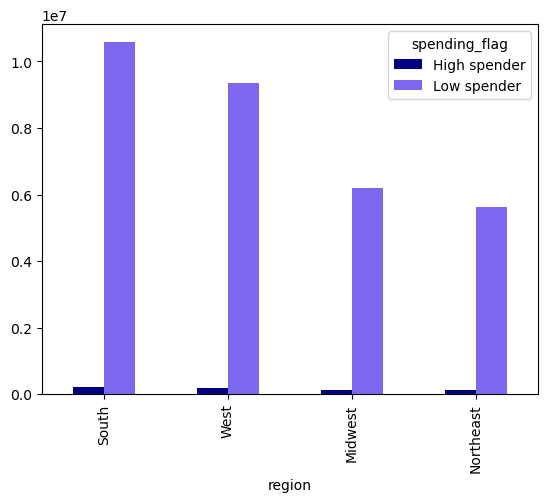

In [12]:
#ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()
bar = crosstab.sort_values('Low spender', ascending=False).plot.bar(color = ['navy', 'mediumslateblue'])

In [13]:
# export the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending.png'))

##### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
# create a for-loop top pick out low-activity customers
result = []

for value in ords_prods_custs['max_order']:
    if value < 5:
        result.append('Low activity')
    else:
        result.append('Regular activity')

In [15]:
result

['Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular activity',
 'Regular act

In [16]:
# create a column named 'activity_flag'
ords_prods_custs['activity_flag'] = result

In [17]:
ords_prods_custs['activity_flag'].value_counts()

Regular activity    30964564
Low activity         1440295
Name: activity_flag, dtype: int64

In [ ]:
# creata a subset that excludes low-activity customers
df_active_users = ords_prods_custs.loc[ords_prods_custs['activity_flag'] == 'Regular activity']

In [ ]:
# check the output
df_active_users.head(15)

In [ ]:
# exporting the subset
df_active_users.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_users.pkl'))

##### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [ ]:
# statistics summary of age, income, and n_dependants variable
ords_prods_custs[['age', 'income', 'n_dependants' ]].describe()

In [ ]:
# import departments dataset
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)

In [ ]:
# view dept df
dept

Customer profiling:
1. Single Adult: 
- 25 - 40 years old
- Income: <$100,000
- No dependents


2. Young Parent: 
- 25 -35 years old
- Income: $50,000 - $150,000
- One or more dependents
- Baby items (department_id=18)

3. Empty Nester: 
- 55+ years old
- Income: >= 100,000
- No dependents

4. College Student: 
- 18 - 24 years old
- Low - moderate income: < 50,000
- No dependents
- Budget-conscious, quick-and-easy meal: canned goods (department_id=15)

In [ ]:
# create Single Adult profiling
single_adult = ords_prods_custs.loc[(ords_prods_custs['age'] >= 25) & (ords_prods_custs['age'] <= 40) 
                                    & (ords_prods_custs['income'] < 100000) & (ords_prods_custs['n_dependants'] == 0), 'profiling'] = 'Single Adult'

In [ ]:
# create Young Parent profiling
young_parent = ords_prods_custs.loc[(ords_prods_custs['age'] >= 25) & (ords_prods_custs['age'] <= 35) 
                                    & (ords_prods_custs['income'] < 100000)
                                    & (ords_prods_custs['n_dependants'] >= 1)
                                    & (ords_prods_custs['department_id'] == 18), 'profiling'] = 'Young Parent'

In [ ]:
# create Empty Nester profiling
empty_nester = ords_prods_custs.loc[(ords_prods_custs['age'] >= 55) 
                                    & (ords_prods_custs['income'] >= 100000)
                                    & (ords_prods_custs['n_dependants'] == 0), 'profiling'] = 'Empty Nester'

In [ ]:
# create College Student profiling
young_parent = ords_prods_custs.loc[(ords_prods_custs['age'] >= 18) & (ords_prods_custs['age'] < 25) 
                                    & (ords_prods_custs['income'] < 50000)
                                    & (ords_prods_custs['n_dependants'] == 0)
                                    & (ords_prods_custs['department_id'] == 15), 'profiling'] = 'College Student'

In [ ]:
ords_prods_custs[['age','income', 'profiling']].head(5)


In [ ]:
ords_prods_custs['profiling']

In [ ]:
ords_prods_custs['profiling'].value_counts(dropna = False)

##### 6. Visualization of Profiling Distribution

In [ ]:
profiling_freq = ords_prods_custs['profiling'].value_counts()

In [ ]:
profiling_freq 

In [ ]:
bar_profiling = profiling_freq.sort_values(ascending=False).plot.bar()
bar_profiling.ticklabel_format(style='plain', axis='y')

In [ ]:
# exporting the bar chart
bar_profiling.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiling.png'))

##### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [ ]:
ords_prods_custs.groupby('profiling').agg({'prices':['max', 'mean', 'min', ]})

In [ ]:
ords_prods_custs.groupby('profiling').agg({'spending_flag':['max', 'mean', 'min', ]})

##### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
